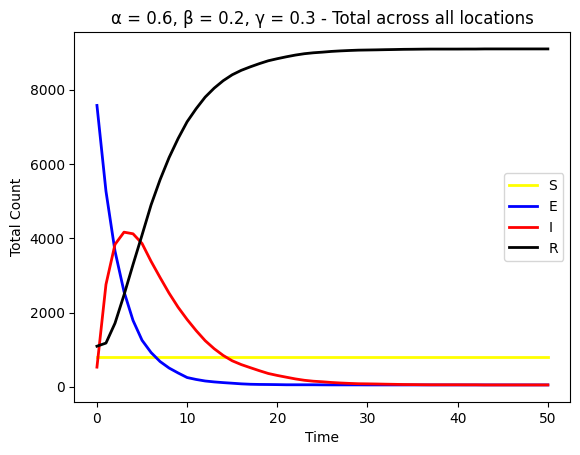

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters

N = 10  # Basic population number

D = 10  # Number of locations

L = 3   # Number of locations connected to the outside world 

T = 50  # Simulation Time Max

# The parameter α is the infection rate, β is the recovery rate, and γ is exposure rate
alpha, beta, gamma = 0.6, 0.2, 0.3

# Initial population counts for each compartment (S, E, I, R) for all locations
initial_population = np.array([[80*N, 5*N, 5*N, 10*N] for _ in range(D)])

# Initialize lists to store population counts over time
population_S = [initial_population[:, 0]]
population_E = [initial_population[:, 1]]
population_I = [initial_population[:, 2]]
population_R = [initial_population[:, 3]]

# Simulation loop
for t in range(1, T + 1):
    # Migration step - not implemented yet
    
    # Infection step
    for i in range(1, D):
        # Calculate transitions from E to I
        delta_EI = np.random.binomial(population_E[-1][i], gamma)
        # Calculate transitions from I to R
        delta_IR = np.random.binomial(population_I[-1][i], beta)
        # Calculate transitions from S to E
        delta_SE = np.random.binomial(population_S[-1][i], min(1, alpha * population_I[-1][i] / N))
        
        # Update population counts for compartment S, E, I, R
        population_S[-1][i] -= delta_SE
        population_E[-1][i] += delta_SE - delta_EI
        population_I[-1][i] += delta_EI - delta_IR
        population_R[-1][i] += delta_IR
        
    # Append current population counts to the lists
    population_S.append(population_S[-1].copy())
    population_E.append(population_E[-1].copy())
    population_I.append(population_I[-1].copy())
    population_R.append(population_R[-1].copy())

# Convert lists to numpy arrays for plotting
time_points = np.arange(T + 1)
population_S = np.array(population_S).T
population_E = np.array(population_E).T
population_I = np.array(population_I).T
population_R = np.array(population_R).T


# Calculate the total number of each state
total_S = np.sum(population_S, axis=0)
total_E = np.sum(population_E, axis=0)
total_I = np.sum(population_I, axis=0)
total_R = np.sum(population_R, axis=0)

# Plotting
plt.plot(time_points, total_S, color='yellow', lw=2, label="S")
plt.plot(time_points, total_E, color='blue', lw=2, label="E")
plt.plot(time_points, total_I, color='red', lw=2, label="I")
plt.plot(time_points, total_R, color='black', lw=2, label="R")

plt.title(f"α = {alpha}, β = {beta}, γ = {gamma} - Total across all locations")
plt.xlabel("Time")
plt.ylabel("Total Count")
plt.legend()
plt.show()
